In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import math
import numpy as np

In [2]:
dframe = pd.read_csv("take_home_freight.csv")

In [3]:
dframe.head()

,Unnamed: 0,vended_id,date_trans,vendor_name,productText,sku,zone_code,delivery_state,length,width,height,charged_weight,freight_cost,carrier,service_type
0,0,93434534,2020-12-27,JCW API,Bumper Grille,003510TR1530003,5,NY,61.0,14.0,4.0,9.0,19.33,FedEx,FedEx Home Delivery (FedEx Ground Service)
1,2,93455745,2020-12-27,US Auto Parts Nevada API,Window Regulator,7194GPERG491702,8,FL,28.0,18.0,13.0,17.0,16.25,FedEx,FedEx Home Delivery (FedEx Ground Service)
2,3,93457913,2020-12-27,JCW API,Fender Flares,9355JPERJ553908,5,MA,39.0,26.0,14.0,36.0,14.80,FedEx,FedEx Home Delivery (FedEx Ground Service)
3,4,93459077,2020-12-27,JCW API,Water Pump,5313MPERM313502,7,CA,15.0,10.0,9.0,6.0,9.09,FedEx,FedEx Home Delivery (FedEx Ground Service)
4,5,93463732,2020-12-27,JCW API,Mass Air Flow Sensor,7613MPERM316709,6,ID,12.0,8.0,7.0,2.0,11.12,FedEx,FedEx Home Delivery (FedEx Ground Service)


In [4]:
dframe.shape

(584335, 15)

In [5]:
dframe["girth"] = 2*dframe["width"] + 2*dframe["height"]

In [6]:
dframe.head()

,Unnamed: 0,vended_id,date_trans,vendor_name,productText,sku,zone_code,delivery_state,length,width,height,charged_weight,freight_cost,carrier,service_type,girth
0,0,93434534,2020-12-27,JCW API,Bumper Grille,003510TR1530003,5,NY,61.0,14.0,4.0,9.0,19.33,FedEx,FedEx Home Delivery (FedEx Ground Service),36.0
1,2,93455745,2020-12-27,US Auto Parts Nevada API,Window Regulator,7194GPERG491702,8,FL,28.0,18.0,13.0,17.0,16.25,FedEx,FedEx Home Delivery (FedEx Ground Service),62.0
2,3,93457913,2020-12-27,JCW API,Fender Flares,9355JPERJ553908,5,MA,39.0,26.0,14.0,36.0,14.80,FedEx,FedEx Home Delivery (FedEx Ground Service),80.0
3,4,93459077,2020-12-27,JCW API,Water Pump,5313MPERM313502,7,CA,15.0,10.0,9.0,6.0,9.09,FedEx,FedEx Home Delivery (FedEx Ground Service),38.0
4,5,93463732,2020-12-27,JCW API,Mass Air Flow Sensor,7613MPERM316709,6,ID,12.0,8.0,7.0,2.0,11.12,FedEx,FedEx Home Delivery (FedEx Ground Service),30.0


In [7]:
type(dframe.date_trans[0])

str

In [8]:
dframe[(dframe["length"] > 108.0) & (dframe["length"]+dframe["girth"] > 165.0)].head(2)

,Unnamed: 0,vended_id,date_trans,vendor_name,productText,sku,zone_code,delivery_state,length,width,height,charged_weight,freight_cost,carrier,service_type,girth
136693,159328,95089262,2021-02-04,US Auto Parts Virginia API,Bumper,9010FBR010901,5,FL,114.0,26.0,23.0,171.0,47.15,FedEx,FedEx Home Delivery (FedEx Ground Service),98.0
160756,187637,95331515,2021-02-10,JCW API,Grille Assembly,1070F0161,5,TX,113.0,20.0,9.0,51.0,39.96,FedEx,FedEx Home Delivery (FedEx Ground Service),58.0


In [9]:
dframe[(dframe["length"] > 108.0) & (dframe["length"]+dframe["girth"] > 165.0)].shape

(12, 16)

In [10]:
dframe["unauthorized"] = 0

In [11]:
dframe.head(2)

,Unnamed: 0,vended_id,date_trans,vendor_name,productText,sku,zone_code,delivery_state,length,width,height,charged_weight,freight_cost,carrier,service_type,girth,unauthorized
0,0,93434534,2020-12-27,JCW API,Bumper Grille,003510TR1530003,5,NY,61.0,14.0,4.0,9.0,19.33,FedEx,FedEx Home Delivery (FedEx Ground Service),36.0,0
1,2,93455745,2020-12-27,US Auto Parts Nevada API,Window Regulator,7194GPERG491702,8,FL,28.0,18.0,13.0,17.0,16.25,FedEx,FedEx Home Delivery (FedEx Ground Service),62.0,0


In [12]:
dframe.loc[(dframe["length"] > 108.0) & (dframe["length"]+dframe["girth"] > 165.0), "unauthorized"] = 1
#dframe["unauthorized"] = 

In [13]:
dframe[dframe["unauthorized"] == 1].shape

(12, 17)

In [14]:
dframe["week"] = (pd.to_datetime(dframe["date_trans"], errors ='coerce')).dt.isocalendar().week

In [15]:
dframe["week"] = dframe["week"] + 1

In [16]:
#dframe[dframe["week"] == 54,"week"] = 1 
dframe.loc[dframe["week"] == 54,"week"] = 1

In [17]:
dframe["week"].unique()

<IntegerArray>
[53, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Length: 20, dtype: UInt32

In [18]:
dframe[dframe["week"] > 18].shape[0]

33124

In [19]:
dframe[dframe["week"] == 53].date_trans.min()

'2020-12-27'

In [20]:
dframe[dframe["week"] == 53].date_trans.max()

'2020-12-27'

In [21]:
dframe[dframe["week"] == 1].date_trans.min()

'2020-12-28'

In [22]:
dframe[dframe["week"] == 1].date_trans.max()

'2021-01-03'

In [23]:
dframe.groupby('week') \
       .agg({'unauthorized':'sum'}) \
       .reset_index()

,week,unauthorized
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,2


In [24]:
#dframe.groupby("week")["unauthorized"].sum()

In [25]:
### 1 ####
dframe[dframe["unauthorized"]==1].shape[0]/19

0.631578947368421

In [26]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$

In [27]:
dframe["oversized"] = 0

In [28]:
dframe.loc[(dframe["length"] <= 108.0) & (dframe["length"] > 96.0) &
           (dframe["length"]+dframe["girth"] <= 165.0) & (dframe["length"]+dframe["girth"] > 130.0)
           , "oversized"] = 1

In [29]:
dframe[dframe["oversized"] == 1].shape

(13, 19)

In [30]:
dframe.groupby('week') \
       .agg({'unauthorized':'sum'}) \
       .reset_index()

,week,unauthorized
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,2


In [31]:
### 2 ####
dframe[dframe["oversized"]==1].shape[0]/19

0.6842105263157895

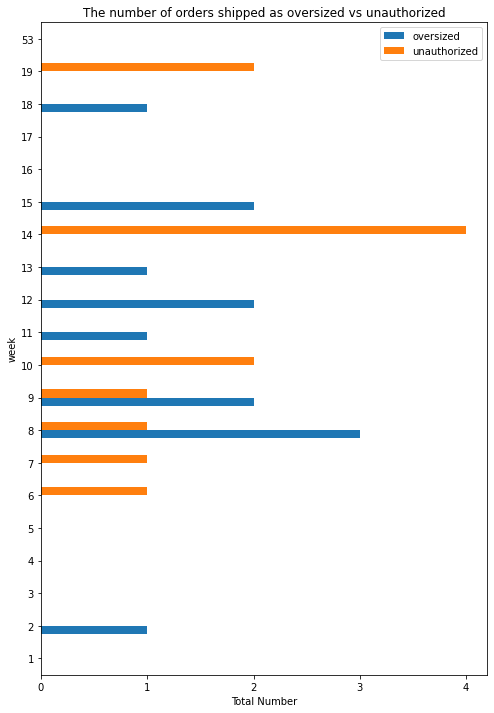

In [32]:

oversized = dframe.groupby('week')['oversized'].sum()
unauthorized = dframe.groupby('week')['unauthorized'].sum()

irregular_df = pd.DataFrame({'oversized': oversized,'unauthorized':unauthorized})
ax = irregular_df.plot(kind='barh', figsize=(8,12));
#ax.set_xticklabels(fontsize=20)

ax.set_xlabel('Total Number')
ax.set_xticks(np.arange(0, 5, 1))
ax.set_title('The number of orders shipped as oversized vs unauthorized');

In [33]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$

In [34]:
#dframe['week'] = dframe['week'].dt.week

In [35]:
#dframe.head(2)

In [36]:
#dframe[dframe["week"]==1].head(1)

In [37]:
#dframe[dframe["week"]==2].head(2)

In [38]:
#dframe.groupby('week') \
#       .agg({'unauthorized':'sum'}) \
#dframe.groupby("week")["unauthorized"].sum()

In [39]:
'''
def plot_frequency(subset, group, x_title="Number of Packages", y_title="Subscription status"):
    ax = dframe.groupby(group)[subset].sum().plot(
                                kind='barh', figsize=(8,5), 
                                title='Number of unique users per category');
    ax.set_xlabel(x_title);
    #ax.set_yticklabels(labels, rotation=0)
    ax.set_ylabel(y_title);
'''
# Test    
#plot_frequency(['userId'], ['churn'], ['Active', 'Cancelled'])

'\ndef plot_frequency(subset, group, x_title="Number of Packages", y_title="Subscription status"):\n    ax = dframe.groupby(group)[subset].sum().plot(\n                                kind=\'barh\', figsize=(8,5), \n                                title=\'Number of unique users per category\');\n    ax.set_xlabel(x_title);\n    #ax.set_yticklabels(labels, rotation=0)\n    ax.set_ylabel(y_title);\n'

In [40]:
#dframe.groupby("week")["unauthorized"].sum()

In [41]:
# (subset, group, labels, x_title="Number of users", y_title="Subscription status"):

#plot_frequency(['unauthorized'], ['week'])

In [42]:
#dframe.groupby('week') \
#       .agg({'oversized':'sum'}) \
#       .reset_index()

In [43]:
dframe.productText.nunique()

648

In [44]:

#dframe.groupby("week")["oversized"].agg("sum")

In [45]:
#plot_frequency(['oversized'], ['week'])

In [46]:
dframe.vendor_name.unique()

array(['JCW API', 'US Auto Parts Nevada API',
       'US Auto Parts Virginia API', 'Carparts GPT API',
       'US Auto Parts PERU API', 'Carparts PA API'], dtype=object)

In [47]:
#### 3  ####
#dframe.groupby("vendor_name")["oversized"].agg("sum")
dframe.groupby('vendor_name') \
       .agg({'oversized':'sum'}) \
       .reset_index()

,vendor_name,oversized
0,Carparts GPT API,0
1,Carparts PA API,0
2,JCW API,5
3,US Auto Parts Nevada API,0
4,US Auto Parts PERU API,0
5,US Auto Parts Virginia API,8


In [48]:
#plot_frequency(['oversized'], ['vendor_name'])

In [49]:
#### 3 ####
#dframe.groupby("vendor_name")["unauthorized"].agg("sum")
dframe.groupby('vendor_name') \
       .agg({'unauthorized':'sum'}) \
       .reset_index()

,vendor_name,unauthorized
0,Carparts GPT API,0
1,Carparts PA API,0
2,JCW API,2
3,US Auto Parts Nevada API,0
4,US Auto Parts PERU API,1
5,US Auto Parts Virginia API,9


In [50]:
#plot_frequency(['unauthorized'], ['vendor_name'])

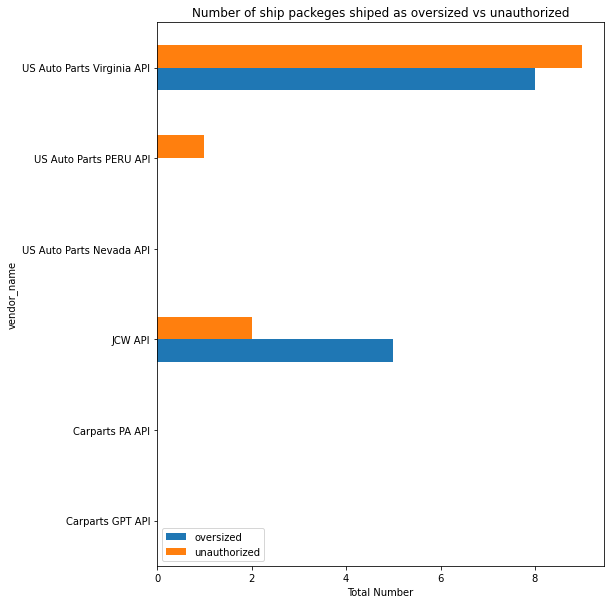

In [51]:
### 3
oversizedVender = dframe.groupby('vendor_name')['oversized'].sum()
unauthorizedVender = dframe.groupby('vendor_name')['unauthorized'].sum()

vender_df = pd.DataFrame({'oversized': oversizedVender,'unauthorized':unauthorizedVender})

ax = vender_df.plot(kind='barh', figsize=(8,10));
ax.set_xlabel('Total Number')
ax.set_title('Number of ship packeges shiped as oversized vs unauthorized');

In [52]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$

In [53]:
dframe["dimWeight"] = (dframe["length"]*dframe["width"]*dframe["height"]/400).apply(np.ceil)

In [54]:
#adult_names = titanic.loc[titanic["Age"] > 35, "Name"]
dframe.loc[(dframe["productText"]=="Muffler") & 
           (dframe["oversized"] == 1)
           ,["dimWeight","zone_code"]]

,dimWeight,zone_code
216607,51.0,5
342959,40.0,4
448019,24.0,5
537329,35.0,8


In [55]:
dframe["unauthAndOver"] = dframe["unauthorized"] + dframe["oversized"]

In [56]:
dframe.loc[dframe["oversized"] == 1,"productText"]

40870     Driveshaft
177692    Driveshaft
181830    Driveshaft
197279    Driveshaft
212264    Driveshaft
216607       Muffler
282584    Driveshaft
342765    Driveshaft
342959       Muffler
353944    Driveshaft
431206    Driveshaft
448019       Muffler
537329       Muffler
Name: productText, dtype: object

In [57]:
dframe[["length", "width","height","charged_weight","dimWeight","freight_cost","unauthAndOver"]].head(3)

,length,width,height,charged_weight,dimWeight,freight_cost,unauthAndOver
0,61.0,14.0,4.0,9.0,9.0,19.33,0
1,28.0,18.0,13.0,17.0,17.0,16.25,0
2,39.0,26.0,14.0,36.0,36.0,14.80,0


In [58]:
dftest = dframe[["length", "width","height","charged_weight","dimWeight","freight_cost","unauthAndOver"]]

In [59]:
dftest[dftest["charged_weight"] != dftest["dimWeight"]].shape[0]

226448

In [60]:
dframe[(dframe["oversized"]== 1) & (dframe["unauthAndOver"] == 1)].freight_cost.mean()
dframe[(dframe["oversized"]== 1) & (dframe["unauthAndOver"] == 1)].charged_weight.max()

90.0

In [61]:
### 4 

In [62]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$

In [63]:
#### 5 ####
dframe[(dframe["unauthorized"] == 1) | (dframe["oversized"] == 1)].groupby("productText")[["unauthorized","oversized"]].sum()

,unauthorized,oversized
productText,,
Bumper,2,0
Bumper Cover,2,0
Driveshaft,0,9
Engine Splash Shield,1,0
Grille Assembly,1,0
Muffler,3,4
Roll Pan,1,0
Step Bumper,2,0


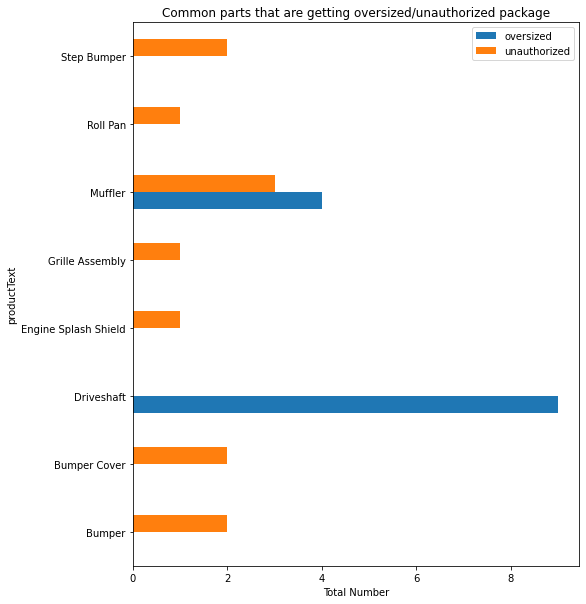

In [64]:
users_1 = dframe[(dframe["unauthorized"] == 1) | (dframe["oversized"] == 1)].groupby('productText')['oversized'].sum()

users_0 = dframe[(dframe["unauthorized"] == 1) | (dframe["oversized"] == 1)].groupby('productText')['unauthorized'].sum()

users_df = pd.DataFrame({'oversized': users_1,'unauthorized':users_0})
ax = users_df.plot(kind='barh', figsize=(8,10));
ax.set_xlabel('Total Number')
ax.set_title('Common parts that are getting oversized/unauthorized package');

In [65]:
dframe.loc[(dframe["productText"]=="Driveshaft") & 
           (dframe["oversized"] == 1)
           ,["dimWeight","zone_code"]]

,dimWeight,zone_code
40870,18.0,5
177692,13.0,5
181830,34.0,3
197279,21.0,4
212264,23.0,2
282584,13.0,3
342765,22.0,4
353944,17.0,8
431206,33.0,4


In [66]:
dframe[(dframe["oversized"]== 1) & (dframe["unauthAndOver"] == 1)].shape[0]

13

In [67]:
#dframe[(dframe["oversized"]== 0) & (dframe["unauthAndOver"] == 0)].charged_weight.mean()
dframe[(dframe["oversized"]== 0) & (dframe["unauthAndOver"] == 0)].freight_cost.mean()

19.38844467837685

In [68]:
dframe[(dframe["oversized"]== 0) & (dframe["unauthAndOver"] == 0)].charged_weight.max()

274.0

In [69]:
dframe[(dframe["oversized"]== 0) & (dframe["unauthAndOver"] == 0)].shape[0]

584310

In [70]:
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#$$$$$$$$$$$$$

In [71]:
#### 6 ####
dframe[(dframe["unauthorized"] == 1) | (dframe["oversized"] == 1)].groupby("productText")[["unauthorized","oversized"]].sum()

,unauthorized,oversized
productText,,
Bumper,2,0
Bumper Cover,2,0
Driveshaft,0,9
Engine Splash Shield,1,0
Grille Assembly,1,0
Muffler,3,4
Roll Pan,1,0
Step Bumper,2,0


In [72]:
dframe.head(1)

,Unnamed: 0,vended_id,date_trans,vendor_name,productText,sku,zone_code,delivery_state,length,width,...,charged_weight,freight_cost,carrier,service_type,girth,unauthorized,week,oversized,dimWeight,unauthAndOver
0,0,93434534,2020-12-27,JCW API,Bumper Grille,003510TR1530003,5,NY,61.0,14.0,...,9.0,19.33,FedEx,FedEx Home Delivery (FedEx Ground Service),36.0,0,53,0,9.0,0


In [73]:
dframe["regular"] = 0

In [74]:
dframe.loc[dframe["oversized"]+dframe["unauthorized"] == 0, "regular"] = 1

In [75]:
dframe["overAndReg"] = dframe["oversized"] + dframe["regular"]

In [76]:
dfDual = dframe.groupby("sku")[["oversized","unauthorized","regular","unauthAndOver","overAndReg"]].sum()

In [77]:
dfDual[(dfDual["oversized"] != dfDual["unauthAndOver"])].shape[0]

11

In [78]:
dfDual[(dfDual["oversized"] != dfDual["unauthAndOver"])]

,oversized,unauthorized,regular,unauthAndOver,overAndReg
sku,,,,,
1013CPERC310153,0,1,1497,1,1497
1067BPERB760132,0,1,1,1,1
1070F0161,0,1,207,1,207
1169KPERK961115,1,2,0,3,1
1169TPERT961126,3,1,3,4,6
39DF319,0,1,114,1,114
5528CPERC825513,0,1,561,1,561
63010NPERN010364P,0,1,35,1,35
6528CPERC825618,0,1,113,1,113


In [79]:
dfDual[(dfDual["regular"] != dfDual["overAndReg"])].shape[0]

7

In [80]:
### 6,7
dfDual[(dfDual["regular"] != dfDual["overAndReg"]) & (dfDual["oversized"] != dfDual["overAndReg"])]

,oversized,unauthorized,regular,unauthAndOver,overAndReg
sku,,,,,
005545FR4550002,1,0,28,1,29
1169TPERT961126,3,1,3,4,6
5545HPERH545501,1,0,130,1,131
5545LPERL545506,5,0,104,5,109


In [81]:
(df.groupby('sku')
    .agg({'Organisation Name':'count', 'oversized': 'sum', 'unauthorized': 'sum', 'unauthoAndOver': 'sum'})
    .reset_index()
    .rename(columns={'Organisation Name':'Organisation Count'})

SyntaxError: unexpected EOF while parsing (<ipython-input-81-a7f6a8f528cc>, line 4)

In [ ]:
dfDual[(dfDual["unauthorized"] != dfDual["unauthAndOver"])]

In [ ]:
### 6,7
dfDual[(dfDual["oversized"] != dfDual["unauthAndOver"]) & (dfDual["unauthorized"] != dfDual["unauthAndOver"])]

In [ ]:
## oversized vs regular
dfDual[(dfDual["oversized"] != dfDual["unauthAndOver"]) & (dfDual["unauthorized"] != dfDual["unauthAndOver"])]

In [ ]:
# oversized vs unauthorized
dfDual[(dfDual["oversized"] != dfDual["unauthAndOver"]) & (dfDual["unauthorized"] != dfDual["unauthAndOver"])]

In [ ]:
dframe.columns

In [83]:
!pip3 install session-info

  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8053 sha256=0a3f1659f04dcbe5a9cae5f0e3ae5534cedad7f06ea384a62272332723502225
  Stored in directory: c:\users\main user\appdata\local\pip\cache\wheels\5c\1b\4d\111d73980c5c6a8e5e5905a19eccc34296cb359cac54c6c5b9
Successfully built session-info


In [84]:
import session_info

In [85]:
session_info.show()